In [22]:
%matplotlib inline
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()
DATE_AXIS = {'Jan  ': 'Jan', 'Feb  ': 'Feb', 'Mar  ': 'Mar', 'Apr  ': 'Apr', 'May  ': 'May', 'Jun  ': 'Jun',
             'July  ': 'Jul', 'Aug  ': 'Aug', 'Sep  ': 'Sep', 'Oct ': 'Oct', 'Nov': 'Nov', 'Dec': 'Dec'} # лишние пробелы
FILENAME = 'rnd_contest_data.xlsx'
SHEET_WITH_DATA = 'REF raw data'
SHEET_WITH_BRANDS = 'brand encoding'
ALL_COLUMNS = ['Source', 'Month', 'Year', 'Logic', 'Brand', 'Model', 'CONSTRUCTION', 'NO. OF DOORS', 'FREEZ. POSITION',
               'HEIGHT IN CM ', 'WIDTH IN CM', 'DEPTH IN CM', 'ENERGY LABEL EU', 'NOFROST SYSTEM', 'NET LTRS.',
               'NETFREEZER LTR.', 'NETFRIG. LTRS.', 'FRONT DECORAT.', 'ICE-CUBE DISPEN', 'WATER DISPENSER',
               '0° COOLING',
               'DISPLAY', 'MOUNTING SYSTEM', 'FirstActivity', 'Sales Units', 'Sales Units%', 'SALES THS.UAH',
               'SALES THS.USD', 'SALES THS.EUR', 'Sales Value%', 'D.UNW. SALES', 'D.WGT. SALES', 'PRICE UAH/UN.',
               'PRICE INDEX%', 'PRICE USD/UN.', 'PRICE EUR/UN.', 'TOS VAL', 'Amount', 'SAP  Name', 'REF type',
               'PJT Name', 'Year2', 'Quarter', 'Type segment', 'TTL Segment', 'Address market', 'Month_', 'Height',
               'Half year', 'Price segment USD_TTL', 'Price segment USD_BMF', 'Price segment USD_TMF',
               'Price segment USD_SBS', 'Price segment USD_B-IN']
def give_data(columns=ALL_COLUMNS):  #получим pandas dataframe
    data = pd.read_excel(FILENAME, sheet_name=SHEET_WITH_DATA)
    data = data[columns] #берем не все колонки
    data['Month'].replace(list(DATE_AXIS.keys()),
                          list(map(lambda x: datetime.datetime.strptime(x + '2018', '%b%Y'), list(DATE_AXIS.values()))),
                          inplace=True)
    data.rename(columns={'Sales Units': 'Quantity', 'PRICE USD/UN.': 'PriceUSD'}, inplace=True)
    data = data[data['Brand'] != '<OT>']
    return data

In [23]:
data = give_data()
data_traditional = data[data['Source'] == 'Traditional Sales']#не берем интернет-продажи
internet_sales = data[data['Source'] == "Internet Sales"]
data_traditional

,Source,Month,Year,Logic,Brand,Model,CONSTRUCTION,NO. OF DOORS,FREEZ. POSITION,HEIGHT IN CM,...,TTL Segment,Address market,Month_,Height,Half year,Price segment USD_TTL,Price segment USD_BMF,Price segment USD_TMF,Price segment USD_SBS,Price segment USD_B-IN
0,Traditional Sales,2018-01-01,2018,Weekly,INDESIT,TIAA 14,FREESTANDING,2.0,FREEZER TOP,145,...,0 < 12000 UAH,<13000,NaN,Other,NaN,0 < 450 USD,0 < 450 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
1,Traditional Sales,2018-01-01,2018,Weekly,WHIRLPOOL,BSNF 9121 OX,FREESTANDING,2.0,FREEZER BOTTOM,201,...,13000 < 16000 UAH,>13000,NaN,Other,NaN,450 < 500 USD,450 < 500 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
2,Traditional Sales,2018-01-01,2018,Weekly,LG,GA-B429SECZ,FREESTANDING,2.0,FREEZER BOTTOM,191,...,13000 < 16000 UAH,>13000,NaN,Other,NaN,450 < 500 USD,450 < 500 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
3,Traditional Sales,2018-01-01,2018,Weekly,SAMSUNG,RB37J5000SA/UA,FREESTANDING,2.0,FREEZER BOTTOM,201,...,16000 < 18000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
4,Traditional Sales,2018-01-01,2018,Weekly,SAMSUNG,RB37J5000EF/UA,FREESTANDING,2.0,FREEZER BOTTOM,201,...,16000 < 18000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20941,Traditional Sales,2018-12-01,2018,Weekly,BEKO,RCNA355K20PT,FREESTANDING,2.0,FREEZER BOTTOM,201,...,12000 < 13000 UAH,<13000,NaN,Other,NaN,450 < 500 USD,450 < 500 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
20942,Traditional Sales,2018-12-01,2018,Weekly,SAMSUNG,RB33J3305SS/UA,FREESTANDING,2.0,FREEZER BOTTOM,185,...,13000 < 16000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
20943,Traditional Sales,2018-12-01,2018,Weekly,SAMSUNG,RB37J5225EF/UA,FREESTANDING,2.0,FREEZER BOTTOM,201,...,18000 < 20000 UAH,>13000,NaN,Other,NaN,700 < 800 USD,700 < 800 USD,700 < 800 USD,0 < 900 USD,700 < 800 USD
20944,Traditional Sales,2018-12-01,2018,Weekly,WHIRLPOOL,BSNF 9752 OX,FREESTANDING,2.0,FREEZER BOTTOM,201,...,16000 < 18000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD


In [24]:
def plot_dynamics(data, models=[], title=''):#получим график продаж по всем моделям у models
    sns.set()
    d = data[data['Model'].isin(models)]
    fig = sns.relplot(x='Month', y='SALES THS.USD', hue="Model", kind="line",
                      data=d[['Month', 'SALES THS.USD', 'Model']])
    fig.fig.suptitle(title)
    plt.show()

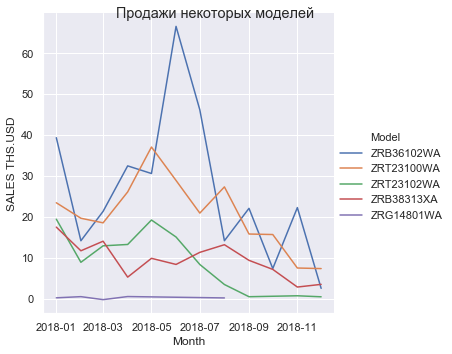

In [25]:
plot_dynamics(data_traditional, ['ZRB36102WA', 'ZRT23102WA', 'ZRB36102WA', 'ZRB38313XA', 'ZRG14801WA', 'ZRT23100WA'], 'Продажи некоторых моделей')

In [26]:
def plot_dynamics_brand(data, name, max_p=8, mean_p=2, min_p=1, correct_length=6):
    models = data[data['Brand'] == name]['Model'].unique()
    r = []
    for i in range(len(models)):
        if (data[data['Model'] == models[i]]).shape[0] < correct_length:
            r += [i]
    models = np.delete(models, r)
    if len(models) > max_p+min_p+mean_p:
        models = sorted(models, key=lambda x: (data[data['Model'] == x])['SALES THS.USD'].mean())
        res = models[:min_p:] + models[len(models) // 2 - mean_p // 2:len(models) // 2 + mean_p // 2 + mean_p % 2:] + models[-max_p::]
        plot_dynamics(data, res, name)
    else:
        plot_dynamics(data, models, name)

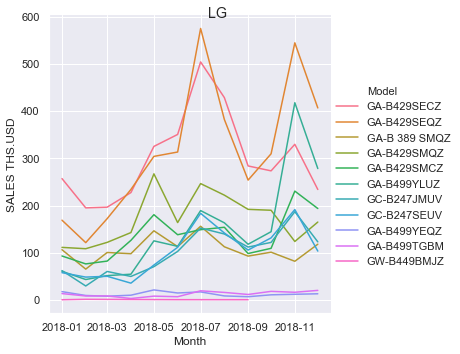

In [27]:
plot_dynamics_brand(data_traditional, 'LG')

In [39]:
def give_models(data): #получим словарь: ключ-бренд,значение-список моделей
    res = {}
    for i in list(data['Brand'].unique()):
        res[i] = list(data[data['Brand'] == i]['Model'].unique())
    return res


In [40]:
def elasticity_ols(data, give_info=False):#получим линейную регрессию относительно dataframe: Quantity ~ PriceUSD 
    linreg = smf.ols('Quantity ~ PriceUSD', data=data).fit()
    if give_info:
        print(linreg.summary())
        sns.set()
        print(1)
        fig1 = plt.figure(figsize=(12,8))
        print(2)
        fig2 = plt.figure(figsize=(12, 8))
        fig3 = plt.figure(figsize=(12,8))
        fig1 = sm.graphics.plot_partregress_grid(linreg, fig=fig1)
        fig2 = sm.graphics.plot_ccpr_grid(linreg, fig=fig2)
        fig3 = sm.graphics.plot_regress_exog(linreg, 'PriceUSD', fig=fig3)
        plt.show()
    return linreg.params.PriceUSD

In [41]:
elasticity_ols(data, give_info=False)

-0.012284414577514623

In [42]:
def elasticity_ols_models(data, models, give_info=False, correct_length=6):#эластичность по моделям (всем) у models
    d = data[data['Model'].isin(models)]
    res = {}
    for j in d.Model.unique():
        d2 = d[d['Model'] == j]
        if (data[data['Model'] == j]).shape[0] >= correct_length:
            try:
                res[j] = elasticity_ols(d2, give_info)
            except Exception:
                pass
    return pd.DataFrame.from_dict({'Model' : list(res.keys()), 'Elasticity' : list(res.values())})

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.136
Date:                Sun, 26 Jan 2020   Prob (F-statistic):              0.312
Time:                        15:51:34   Log-Likelihood:                -57.816
No. Observations:                  12   AIC:                             119.6
Df Residuals:                      10   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.4147     67.666      1.425      0.1

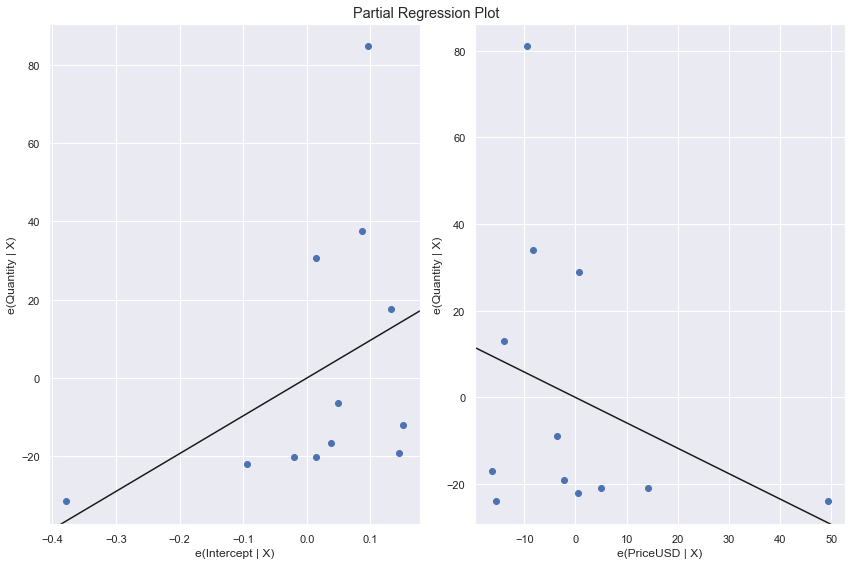

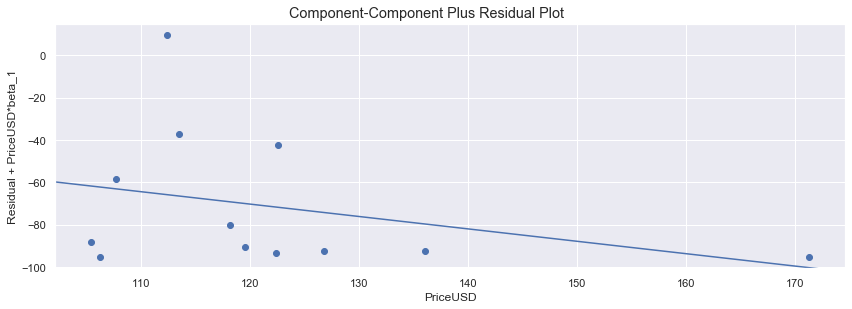

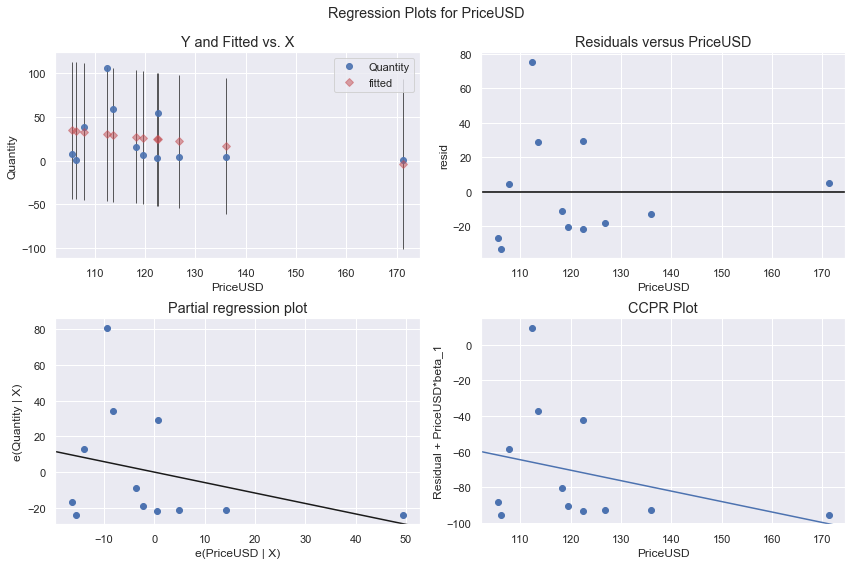

,Model,Elasticity
0,TRADEBRAND,-0.58604


In [56]:
model_tree = give_models(data_traditional)
elasticity_ols_models(data_traditional, model_tree['TRADEBRAND'], give_info=True)

In [38]:
elasticity_ols_models(data_traditional, model_tree['LG'])

,Model,Elasticity
0,GA-B429SECZ,2.804369
1,GA-B429SEQZ,-1.423114
2,GA-B 389 SMQZ,0.825359
3,GA-B429SMQZ,1.883214
4,GA-B429SMCZ,-1.165968
5,GA-B499YLUZ,-4.422547
6,GA-B429SQCZ,2.056106
7,GN-H702HEHZ,-0.301068
8,GC-B247JMUV,-0.437911
9,GA-B 499 YECZ,-0.389902
